In [8]:
import importers
import importlib
importlib.reload(importers)
from importers import SpikeImporter

data_folder = "../data/"
file_name = "11_10_27U2a_2030s_2200s_10000Hz_Force"
file_ending = ".csv"

time_channel = "Time"
signal_channel = "1 Signal"
stimulus_channel = "32 DigMark"
ap_marker_channel = "801 nw-1"
force_channel = "3 Force"

# load the animal file
importer = SpikeImporter(filepath = data_folder + file_name + file_ending, \
                         time_channel = time_channel, signal_channel = signal_channel, stimulus_channel = stimulus_channel, \
                         ap_marker_channel = ap_marker_channel, force_channel = force_channel)

print("Data loaded.")

Data loaded.


In [17]:
# define the max. time so that two sequential waveform-values are belonging to the same AP
# the time is in seconds, so 0.005 equals 5ms
max_gap_time = 0.005

# go through the eletrical stimuli dataframe and construct objects from this
el_stimuli = importer.getElectricalStimuli(channel_name = "32 DigMark")

# go through the dataframe and construct the APs
actpots = importer.getActionPotentials(max_gap_time = max_gap_time, el_stimuli = el_stimuli)

List of eletrical stimuli created.
List of APs created.


In [18]:
import clustering
# reload the clustering classes
# hacky workaround atm
import importlib
importlib.reload(clustering)

from sklearn.cluster import DBSCAN
import numpy as np

# build feature vectors from the features provided by AP class
features = np.array([[ap.getDistanceToPreviousElectricalStimulus(), ap.getNormalizedEnergy()] for ap in actpots])
labels = DBSCAN(eps = 0.0001, min_samples = 3, metric = clustering.actionPotDistance).fit_predict(features)
print("Clustering done.")

Clustering done.


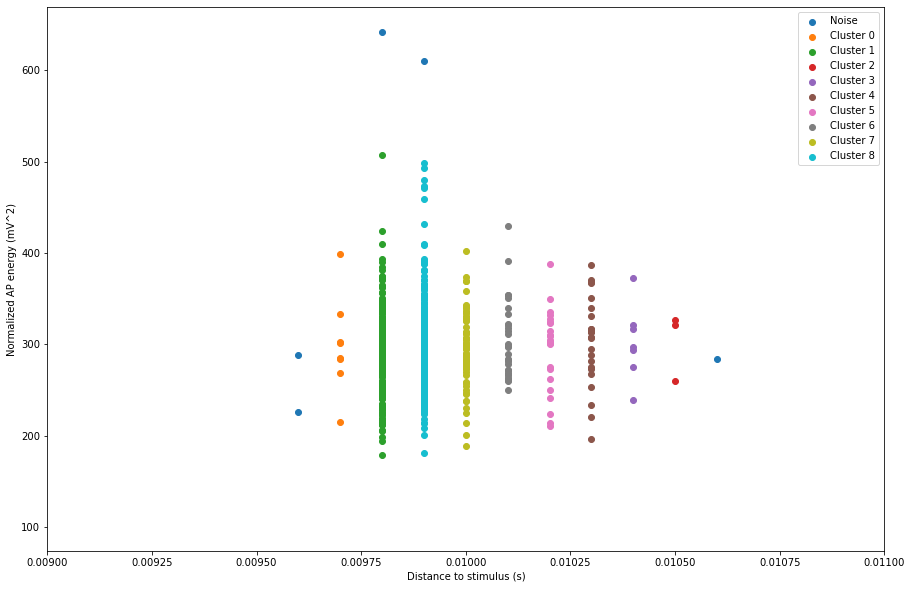

In [21]:
import matplotlib.pyplot as plt

# initialize figure
plt.figure(figsize = (15, 10))

# where to save the results
results_folder = "../results/"
results_ending = ".png"

# iterate over all the clusters and plot them
cluster_index = -1
while cluster_index <= max(labels):
    # get a mask for all samples belonging to the cluster and retrieve those feature vectors
    indices = (labels == cluster_index)
    cluster_features = features[indices]
    # plot the cluster with the appropriate label
    # print("Plotting cluster: " + str(cluster_index))
    plt.scatter(x = cluster_features[: , 0], y = cluster_features[:, 1], label = "Cluster " + str(cluster_index) if cluster_index > -1 else "Noise")
    # go to the next cluster
    cluster_index = cluster_index + 1

plt.xlabel("Distance to stimulus (s)")
plt.xscale('linear')
plt.xlim(0.009, 0.011)
plt.ylabel("Normalized AP energy (mV^2)")
plt.legend()
plt.savefig(results_folder + "dbscan_clustering_" + file_name + results_ending, dpi = 400)
plt.show()